In [0]:
#ci permette di importare qualsiasi modulo
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/TensorFlow 2.0/modules')
import pandas as pd
import tf_dataset_extractor as e
#import grapher_v1_1 as g
#import LSTM_creator_v1_0 as l
v = e.v
g = e.g
l = e.l

In [0]:
# load dataset
#l.upload.offline_csv()
v.upload.online_csv('/content/drive/My Drive/Colab Notebooks/TensorFlow 2.0/csv/GOOG.csv')
e.K = v.upload.make_backup()

#Univatiate, (Lag=3, Step=1), GOOG

In [0]:
#original copy without preprocessing
v.upload.retrieve_backup(e.K)
e.X = e.X.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)
index = e.X.pop('Date')
raw_values = e.X.copy().values
scaler, e.X = v.partition.scale('all_df', scaler='MinMaxScaler', df=e.X, to_float=True, return_df=True)
e.X = e.X.set_index(index)
#l.preprocessing.transform_to_stationary() #accorciamo di una riga, se lo attiviamo
e.X = l.preprocessing.series_to_supervised(e.X, 3, 1)
#X, y
v.extract.labels(['var1(t)'])

#train, test
X_train_, X_test_ = l.preprocessing.split(0.1, e.X)
y_train_, y_test_ = l.preprocessing.split(0.1, e.y) #sembra non servire a nulla
print(X_train_.shape, X_test_.shape, y_train_.shape, y_test_.shape)
e.X_ = e.X.copy()
e.y_ = e.y.copy()
e.y_

(225, 3) (25, 3) (225, 1) (25, 1)


,var1(t)
3,0.346558
4,0.363150
5,0.377668
6,0.394259
7,0.407076
...,...
248,0.114814
249,0.157859
250,0.197233
251,0.369372


In [0]:
#normal preprocessing
v.upload.retrieve_backup(e.K)
e.X = e.X.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)
index = e.X.pop('Date')
raw_values = e.X.copy().values
scaler, e.X = v.partition.scale('all_df', scaler='MinMaxScaler', df=e.X, to_float=True, return_df=True)
e.X = e.X.set_index(index)
l.preprocessing.transform_to_stationary()
e.X = l.preprocessing.series_to_supervised(e.X, 3, 1)
#X, y
v.extract.labels(['var1(t)'])

#train, test
X_train, X_test = l.preprocessing.split(0.1, e.X)
y_train, y_test = l.preprocessing.split(0.1, e.y) #sembra non servire a nulla
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
e.y

(225, 3) (24, 3) (225, 1) (24, 1)


,var1(t)
3,0.016592
4,0.014518
5,0.016592
6,0.012817
7,-0.006616
...,...
247,-0.049236
248,0.043045
249,0.039374
250,0.172138


In [0]:
#reshape [samples, n_input_timesteps, n_features]
X_train = X_train.reshape((225, 3, 1))
y_train = y_train.reshape((225, 1, 1))
print(X_train.shape, y_train.shape)
#ogni singolo sample ha dimensioni [1, 3, 1]

#LSTM
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, batch_input_shape=(1, 3, 1), stateful=True)) #le dimensioni di ogni singolo sample
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#for i in range(30):
model.fit(X_train, y_train, epochs=3000, batch_size=1, verbose=2, shuffle=False)
model.reset_states()

X_test = X_test.reshape(24, 3, 1)
y_test = y_test.reshape(24, 1, 1)
print(X_test.shape, y_test.shape)

Streaming output truncated to the last 5000 lines.
Epoch 502/3000
225/225 - 0s - loss: 0.0012
Epoch 503/3000
225/225 - 0s - loss: 0.0013
Epoch 504/3000
225/225 - 0s - loss: 0.0012
Epoch 505/3000
225/225 - 0s - loss: 0.0012
Epoch 506/3000
225/225 - 0s - loss: 0.0012
Epoch 507/3000
225/225 - 0s - loss: 0.0012
Epoch 508/3000
225/225 - 0s - loss: 0.0012
Epoch 509/3000
225/225 - 0s - loss: 0.0012
Epoch 510/3000
225/225 - 0s - loss: 0.0014
Epoch 511/3000
225/225 - 0s - loss: 0.0014
Epoch 512/3000
225/225 - 0s - loss: 0.0013
Epoch 513/3000
225/225 - 0s - loss: 0.0013
Epoch 514/3000
225/225 - 0s - loss: 0.0012
Epoch 515/3000
225/225 - 0s - loss: 0.0012
Epoch 516/3000
225/225 - 0s - loss: 0.0012
Epoch 517/3000
225/225 - 0s - loss: 0.0012
Epoch 518/3000
225/225 - 0s - loss: 0.0012
Epoch 519/3000
225/225 - 0s - loss: 0.0012
Epoch 520/3000
225/225 - 0s - loss: 0.0013
Epoch 521/3000
225/225 - 0s - loss: 0.0012
Epoch 522/3000
225/225 - 0s - loss: 0.0012
Epoch 523/3000
225/225 - 0s - loss: 0.0012
Epo

In [0]:
# make a one-step forecast
yhat = model.predict(X_test, verbose=2, batch_size=1) #SENZA LA BATCH_SIZE, prende un input alla volta, con la batch_size tutto il dataset
print(yhat)

24/24 - 0s
[[ 0.0644069 ]
 [ 0.04305176]
 [-0.17532727]
 [ 0.02346321]
 [-0.09423013]
 [-0.20395115]
 [-0.0413169 ]
 [ 0.02494887]
 [-0.07448836]
 [ 0.03894592]
 [-0.00898089]
 [-0.07071912]
 [ 0.00493778]
 [ 0.00958315]
 [-0.08725622]
 [-0.00311256]
 [ 0.00397102]
 [ 0.01296222]
 [ 0.01026456]
 [ 0.07144491]
 [ 0.03790724]
 [-0.00558771]
 [ 0.02097206]
 [ 0.00155332]]


In [0]:
#remove stationary
y_test = y_test.reshape(24, 1)
var1 = y_test_    #contiene i valori originali
var2 = yhat       #contiene i gap
var3 = list()     #lista con i valori adattati
#var1 = var1.values
#var2 = var2.values
var3.append(var1[0])
for i in range(0, len(var2)): #var2, contenendo i gap, ha una riga in meno
  values = var1[i] + var2[i]
  var3.append(values)
var3

# inverse scaling
predicted = scaler.inverse_transform(var3)
predicted

array([[1350.19995824],
       [1381.25501562],
       [1297.8183309 ],
       [1120.76246074],
       [1271.3132788 ],
       [1204.26505965],
       [1027.66083179],
       [1159.07819632],
       [1108.02956763],
       [1057.19399253],
       [1075.28852505],
       [1088.71971422],
       [1101.62138044],
       [1063.70078517],
       [1108.39070904],
       [1084.39768197],
       [1110.29928937],
       [1127.58471684],
       [1131.29003747],
       [1152.24936605],
       [1156.44856179],
       [1116.53778737],
       [1116.32073897],
       [1148.11207533],
       [1221.74893383]])

In [0]:
#inverse scaling
expected = scaler.inverse_transform(y_test_)
expected

array([[1350.2  ],
       [1277.06 ],
       [1205.3  ],
       [1260.   ],
       [1249.7  ],
       [1126.   ],
       [1179.   ],
       [1096.   ],
       [1093.11 ],
       [1056.51 ],
       [1093.05 ],
       [1135.72 ],
       [1061.32 ],
       [1103.77 ],
       [1126.47 ],
       [1111.8  ],
       [1125.67 ],
       [1125.04 ],
       [1147.3  ],
       [1122.   ],
       [1098.26 ],
       [1119.015],
       [1138.   ],
       [1221.   ],
       [1206.5  ]], dtype=float32)

In [0]:
for i in range(len(y_test_)):
  print('iteration=%d, Predicted=%f, Expected=%f' % (i+1, predicted[i], expected[i]))
#non credo la prima iterazione conti: come mai?

iteration=1, Predicted=1350.199958, Expected=1350.199951
iteration=2, Predicted=1381.255016, Expected=1277.060059
iteration=3, Predicted=1297.818331, Expected=1205.300049
iteration=4, Predicted=1120.762461, Expected=1260.000000
iteration=5, Predicted=1271.313279, Expected=1249.699951
iteration=6, Predicted=1204.265060, Expected=1126.000000
iteration=7, Predicted=1027.660832, Expected=1179.000000
iteration=8, Predicted=1159.078196, Expected=1096.000000
iteration=9, Predicted=1108.029568, Expected=1093.109985
iteration=10, Predicted=1057.193993, Expected=1056.510010
iteration=11, Predicted=1075.288525, Expected=1093.050049
iteration=12, Predicted=1088.719714, Expected=1135.719971
iteration=13, Predicted=1101.621380, Expected=1061.319946
iteration=14, Predicted=1063.700785, Expected=1103.770020
iteration=15, Predicted=1108.390709, Expected=1126.469971
iteration=16, Predicted=1084.397682, Expected=1111.800049
iteration=17, Predicted=1110.299289, Expected=1125.670044
iteration=18, Predicted

(25, 1)

#Univariate, (Lag=3, Step=2), GOOG

In [0]:
#original copy without preprocessing
v.upload.retrieve_backup(e.K)
e.X = e.X.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)
index = e.X.pop('Date')
raw_values = e.X.copy().values
scaler, e.X = v.partition.scale('all_df', scaler='MinMaxScaler', df=e.X, to_float=True, return_df=True)
#e.X = e.X.set_index(index)
#l.preprocessing.transform_to_stationary() #accorciamo di una riga, se lo attiviamo
e.X = l.preprocessing.series_to_supervised(e.X, 3, 2)
#X, y
e.y = e.X[['var1(t)', 'var1(t+1)']]
e.X = e.X.drop(['var1(t)', 'var1(t+1)'], axis=1)

#train, test
X_train_, X_test_ = l.preprocessing.split(0.1, e.X)
y_train_, y_test_ = l.preprocessing.split(0.1, e.y) #sembra non servire a nulla
print(X_train_.shape, X_test_.shape, y_train_.shape, y_test_.shape)
e.X_ = e.X.copy()
e.y_ = e.y.copy()
e.y_

(225, 3) (24, 3) (225, 2) (24, 2)


,var1(t),var1(t+1)
3,0.346558,0.363150
4,0.363150,0.377668
5,0.377668,0.394259
6,0.394259,0.407076
7,0.407076,0.400460
...,...,...
247,0.164050,0.114814
248,0.114814,0.157859
249,0.157859,0.197233
250,0.197233,0.369372


In [0]:
#normal preprocessing
v.upload.retrieve_backup(e.K)
e.X = e.X.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)
index = e.X.pop('Date')
raw_values = e.X.copy().values
scaler, e.X = v.partition.scale('all_df', scaler='MinMaxScaler', df=e.X, to_float=True, return_df=True)
e.X = e.X.set_index(index)
l.preprocessing.transform_to_stationary()
e.X = l.preprocessing.series_to_supervised(e.X, 3, 2, drop_col=False)
#X, y
#v.extract.labels(['var1(t)'], ['var1(t+1)'])
e.y = e.X[['var1(t)', 'var1(t+1)']]
e.X = e.X.drop(['var1(t)', 'var1(t+1)'], axis=1)

#train, test
X_train, X_test = l.preprocessing.split(0.1, e.X)
y_train, y_test = l.preprocessing.split(0.1, e.y) #sembra non servire a nulla
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
e.X

(224, 3) (24, 3) (224, 2) (24, 2)


,var1(t-3),var1(t-2),var1(t-1)
3,0.009706,0.006802,0.012527
4,0.006802,0.012527,0.016592
5,0.012527,0.016592,0.014518
6,0.016592,0.014518,0.016592
7,0.014518,0.016592,0.012817
...,...,...,...
246,0.028766,-0.001307,0.046166
247,-0.001307,0.046166,-0.052471
248,0.046166,-0.052471,-0.049236
249,-0.052471,-0.049236,0.043045


In [0]:
#reshape [samples, n_input_timesteps, n_features]
X_train = X_train.reshape((224, 3, 1))
y_train = y_train.reshape((224, 2, 1))
print(X_train.shape, y_train.shape)
#ogni singolo sample ha dimensioni [1, 3, 1]

#LSTM
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(100, activation='relu', batch_input_shape=(1, 3, 1)))
model.add(RepeatVector(2)) #numero di output
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mse', optimizer='adam')
#model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=5, batch_size=1, verbose=2, shuffle=False)
model.reset_states()

X_test = X_test.reshape(24, 3, 1)
y_test = y_test.reshape(24, 2, 1)
print(X_test.shape, y_test.shape)

(224, 3, 1) (224, 2, 1)
Epoch 1/5
224/224 - 1s - loss: 0.0017
Epoch 2/5
224/224 - 1s - loss: 0.0017
Epoch 3/5
224/224 - 1s - loss: 0.0017
Epoch 4/5
224/224 - 1s - loss: 0.0017
Epoch 5/5
224/224 - 1s - loss: 0.0017
(24, 3, 1) (24, 2, 1)


In [0]:
# make a two-step forecast
yhat = model.predict(X_test, verbose=2, batch_size=1) #SENZA LA BATCH_SIZE, prende un input alla volta, con la batch_size tutto il dataset
print(yhat)

In [0]:
#remove stationary
y_test = y_test.reshape(24, 2)

var1 = y_test_.transpose()     #contiene i valori originali [0] per var1(t), [1] per var1(t+1)...
var2 = yhat.transpose()[0]        #contiene i gap
var3 = list()
var4 = list()
predicted = list()             #lista con i valori adattati
#var1 = var1.values
#var2 = var2.values

for a in range(0, len(var1)):
  var3.append(var1[a][0])
  for i in range(0, len(var2[a])): #var2, contenendo i gap, ha una riga in meno
    values = var1[a][i] + var2[a][i]
    var3.append(values)
  var4.append(var3)
  var3 = list()
var4

# inverse scaling
predicted = scaler.inverse_transform(var4)
predicted

array([[1350.19995824, 1350.43162789, 1277.31908689, 1205.55888625,
        1260.25174963, 1249.92869803, 1126.24555356, 1179.23266611,
        1096.22696714, 1093.33393088, 1056.75695531, 1093.31256301,
        1135.97780587, 1061.56385101, 1104.00934754, 1126.70519984,
        1112.04652577, 1125.9294255 , 1125.30840655, 1147.57168524,
        1122.2666035 , 1098.52932985, 1119.28574989, 1138.26939124,
        1221.26681321],
       [1277.06005716, 1277.32729204, 1205.61392252, 1260.31371214,
        1250.00143788, 1126.26212192, 1179.29097869, 1096.26897002,
        1093.36929132, 1056.76393543, 1093.34340056, 1136.03991207,
        1061.63174285, 1104.05812578, 1126.75033533, 1112.07330386,
        1125.962476  , 1125.35461259, 1147.62994753, 1122.33531262,
        1098.5869455 , 1119.34636882, 1138.33396905, 1221.33160656,
        1206.82730708]])

In [0]:
expected = scaler.inverse_transform(y_test_.transpose())
expected

array([[1350.2  , 1277.06 , 1205.3  , 1260.   , 1249.7  , 1126.   ,
        1179.   , 1096.   , 1093.11 , 1056.51 , 1093.05 , 1135.72 ,
        1061.32 , 1103.77 , 1126.47 , 1111.8  , 1125.67 , 1125.04 ,
        1147.3  , 1122.   , 1098.26 , 1119.015, 1138.   , 1221.   ],
       [1277.06 , 1205.3  , 1260.   , 1249.7  , 1126.   , 1179.   ,
        1096.   , 1093.11 , 1056.51 , 1093.05 , 1135.72 , 1061.32 ,
        1103.77 , 1126.47 , 1111.8  , 1125.67 , 1125.04 , 1147.3  ,
        1122.   , 1098.26 , 1119.015, 1138.   , 1221.   , 1206.5  ]],
      dtype=float32)

In [0]:
for a in range(len(y_test_[0])):
  print('t+%d' % (a))
  for i in range(len(y_test_)):
    print('iteration=%d, Predicted=%f, Expected=%f' % (i+1, predicted[a][i], expected[a][i]))
  #non credo la prima iterazione conti: come mai?

t+0
iteration=1, Predicted=1350.199958, Expected=1350.199951
iteration=2, Predicted=1350.431628, Expected=1277.060059
iteration=3, Predicted=1277.319087, Expected=1205.300049
iteration=4, Predicted=1205.558886, Expected=1260.000000
iteration=5, Predicted=1260.251750, Expected=1249.699951
iteration=6, Predicted=1249.928698, Expected=1126.000000
iteration=7, Predicted=1126.245554, Expected=1179.000000
iteration=8, Predicted=1179.232666, Expected=1096.000000
iteration=9, Predicted=1096.226967, Expected=1093.109985
iteration=10, Predicted=1093.333931, Expected=1056.510010
iteration=11, Predicted=1056.756955, Expected=1093.050049
iteration=12, Predicted=1093.312563, Expected=1135.719971
iteration=13, Predicted=1135.977806, Expected=1061.319946
iteration=14, Predicted=1061.563851, Expected=1103.770020
iteration=15, Predicted=1104.009348, Expected=1126.469971
iteration=16, Predicted=1126.705200, Expected=1111.800049
iteration=17, Predicted=1112.046526, Expected=1125.670044
iteration=18, Predi

#Multivariate, (Lag=3, Step=1), [GOOG, US_GDP]

##Creating GDP column

In [0]:
#original copy without preprocessing
v.upload.retrieve_backup(e.K)
e.X = e.X.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)
index = e.X.pop('Date')
e.X

,Open
0,1196.000000
1,1200.680054
2,1203.959961
3,1210.000000
4,1218.000000
...,...
248,1098.260010
249,1119.015015
250,1138.000000
251,1221.000000


[0, 91, 182, 273, 365, 456, 547]

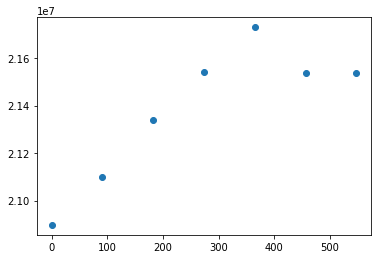

In [0]:
#GDP interpolation
#abbiamo solo valori per Quarter, dobbiamo ottenere quelli per giorno
import matplotlib.pyplot as plt

y = [20897804, 21098827, 21340267, 21542540, 21729124, 21537940, 21537940]
x = [int((365/4)*0), int((365/4)*1), int((365/4)*2), int((365/4)*3), int((365/4)*4), int((365/4)*5), int((365/4)*6)]

plt.plot(x, y, 'o')
x

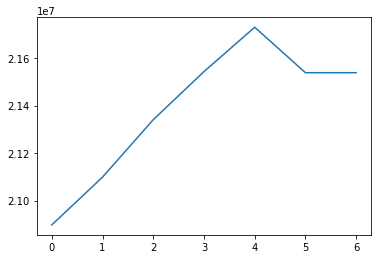

In [0]:
from scipy.interpolate import interp1d
import numpy as np

f = interp1d(x, y, kind='cubic')
plt.plot(f(x))

In [0]:
#today to day_number
import datetime
today = datetime.datetime.now()
today
today = datetime.datetime(2019, 4, 11)
today.strftime('%j')

'101'

In [0]:
list_day = list()
list_GDP = list()
for _ in range(len(index)):
  year = int(index[_][0]+index[_][1]+index[_][2]+index[_][3])
  month = int(index[_][5]+index[_][6])
  day = int(index[_][8]+index[_][9])
  date = datetime.datetime(year, month, day)
  date_add = int(date.strftime('%j'))
  history_day = date_add+((year-2019)*365)
  list_day.append(history_day)
  list_GDP.append(f(history_day))

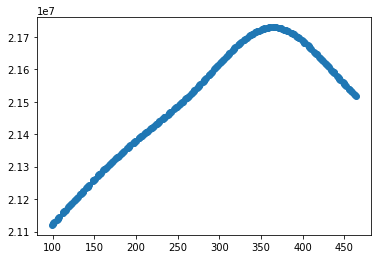

In [0]:
plt.plot(list_day, list_GDP, 'o')

In [0]:
list_GDP = pd.DataFrame(list_GDP)
list_GDP.columns = ['GDP']
list_GDP

,GDP
0,2.112062e+07
1,2.112336e+07
2,2.112610e+07
3,2.112885e+07
4,2.113710e+07
...,...
248,2.153281e+07
249,2.153028e+07
250,2.152286e+07
251,2.152044e+07


In [0]:
e.X = pd.concat([e.X, list_GDP], axis=1)
e.X

,Open,GDP
0,1196.000000,2.112062e+07
1,1200.680054,2.112336e+07
2,1203.959961,2.112610e+07
3,1210.000000,2.112885e+07
4,1218.000000,2.113710e+07
...,...,...
248,1098.260010,2.153281e+07
249,1119.015015,2.153028e+07
250,1138.000000,2.152286e+07
251,1221.000000,2.152044e+07


In [0]:
#we make backup at this point
e.K = v.upload.make_backup()

In [0]:
e.X

,Open,GDP
0,1196.000000,2.112062e+07
1,1200.680054,2.112336e+07
2,1203.959961,2.112610e+07
3,1210.000000,2.112885e+07
4,1218.000000,2.113710e+07
...,...,...
248,1098.260010,2.153281e+07
249,1119.015015,2.153028e+07
250,1138.000000,2.152286e+07
251,1221.000000,2.152044e+07


##Creating GOOG column

In [0]:
#original copy without preprocessing
v.upload.retrieve_backup(e.K)
raw_values = e.X.copy().values
scaler, e.X = v.partition.scale('all_df', scaler='MinMaxScaler', df=e.X, to_float=True, return_df=True)
#e.X = e.X.set_index(index)
#l.preprocessing.transform_to_stationary() #accorciamo di una riga, se lo attiviamo
e.X = l.preprocessing.series_to_supervised(e.X, 3, 1)
#X, y
e.y = e.X[['var1(t)']]
e.X = e.X.drop(['var1(t)', 'var2(t)'], axis=1)

#train, test
X_train_, X_test_ = l.preprocessing.split(0.1, e.X)
y_train_, y_test_ = l.preprocessing.split(0.1, e.y) #sembra non servire a nulla
print(X_train_.shape, X_test_.shape, y_train_.shape, y_test_.shape)
e.X_ = e.X.copy()
e.y_ = e.y.copy()
e.y_

(225, 6) (25, 6) (225, 1) (25, 1)


,var1(t)
3,0.346558
4,0.363150
5,0.377668
6,0.394259
7,0.407076
...,...
248,0.114814
249,0.157859
250,0.197233
251,0.369372


In [0]:
#normal preprocessing
v.upload.retrieve_backup(e.K)
raw_values = e.X.copy().values
scaler, e.X = v.partition.scale('all_df', scaler='MinMaxScaler', df=e.X, to_float=True, return_df=True)
e.X = e.X.set_index(index)
l.preprocessing.transform_to_stationary()
e.X = l.preprocessing.series_to_supervised(e.X, 3, 1, drop_col=False)
#X, y
#v.extract.labels(['var1(t)'], ['var1(t+1)'])
e.y = e.X[['var1(t)']]
e.X = e.X.drop(['var1(t)', 'var2(t)'], axis=1)

#train, test
X_train, X_test = l.preprocessing.split(0.1, e.X)
y_train, y_test = l.preprocessing.split(0.1, e.y) #sembra non servire a nulla
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
e.X

(225, 6) (24, 6) (225, 1) (24, 1)


,var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1)
3,0.009706,0.004505,0.006802,0.004509,0.012527,0.004513
4,0.006802,0.004509,0.012527,0.004513,0.016592,0.013565
5,0.012527,0.004513,0.016592,0.013565,0.014518,0.004528
6,0.016592,0.013565,0.014518,0.004528,0.016592,0.004532
7,0.014518,0.004528,0.016592,0.004532,0.012817,0.004536
...,...,...,...,...,...,...
247,-0.001307,-0.013031,0.046166,-0.004276,-0.052471,-0.004234
248,0.046166,-0.004276,-0.052471,-0.004234,-0.049236,-0.004200
249,-0.052471,-0.004234,-0.049236,-0.004200,0.043045,-0.004154
250,-0.049236,-0.004200,0.043045,-0.004154,0.039374,-0.012199


In [0]:
#reshape [samples, n_input_timesteps, n_features]
X_train = X_train.reshape((225, 6, 1)) #che e.X_ e e.X abbiano eguali colonne o una in più è irrilevante, non ci sconvolgiamo per questo
y_train = y_train.reshape((225, 1, 1))
print(X_train.shape, y_train.shape)
#ogni singolo sample ha dimensioni [1, 6, 1]

#LSTM
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(100, activation='relu', batch_input_shape=(1, 6, 1)))
model.add(RepeatVector(1)) #numero di output
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mse', optimizer='adam')
#model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=3000, batch_size=1, verbose=2, shuffle=False)
model.reset_states()

X_test = X_test.reshape(24, 6, 1)
y_test = y_test.reshape(24, 1, 1)
print(X_test.shape, y_test.shape)

Streaming output truncated to the last 5000 lines.
Epoch 502/3000
225/225 - 1s - loss: 0.0012
Epoch 503/3000
225/225 - 1s - loss: 0.0012
Epoch 504/3000
225/225 - 1s - loss: 0.0012
Epoch 505/3000
225/225 - 1s - loss: 0.0012
Epoch 506/3000
225/225 - 1s - loss: 0.0012
Epoch 507/3000
225/225 - 1s - loss: 0.0012
Epoch 508/3000
225/225 - 1s - loss: 0.0012
Epoch 509/3000
225/225 - 1s - loss: 0.0011
Epoch 510/3000
225/225 - 1s - loss: 0.0012
Epoch 511/3000
225/225 - 1s - loss: 0.0011
Epoch 512/3000
225/225 - 1s - loss: 0.0011
Epoch 513/3000
225/225 - 1s - loss: 0.0012
Epoch 514/3000
225/225 - 1s - loss: 0.0012
Epoch 515/3000
225/225 - 1s - loss: 0.0012
Epoch 516/3000
225/225 - 1s - loss: 0.0012
Epoch 517/3000
225/225 - 1s - loss: 0.0012
Epoch 518/3000
225/225 - 1s - loss: 0.0012
Epoch 519/3000
225/225 - 1s - loss: 0.0012
Epoch 520/3000
225/225 - 1s - loss: 0.0011
Epoch 521/3000
225/225 - 1s - loss: 0.0011
Epoch 522/3000
225/225 - 1s - loss: 0.0011
Epoch 523/3000
225/225 - 1s - loss: 0.0011
Epo

In [0]:
#make a one-step forecast
yhat = model.predict(X_test, verbose=2, batch_size=1) #SENZA LA BATCH_SIZE, prende un input alla volta, con la batch_size tutto il dataset
print(yhat)

24/24 - 0s
[[[ 0.04098825]]

 [[ 0.12899938]]

 [[-0.0398251 ]]

 [[ 0.10061222]]

 [[-0.03636569]]

 [[ 0.0403716 ]]

 [[-0.01116803]]

 [[-0.04107301]]

 [[ 0.03324556]]

 [[-0.07636013]]

 [[ 0.00524229]]

 [[-0.01565242]]

 [[ 0.09016579]]

 [[-0.1156306 ]]

 [[-0.0493173 ]]

 [[ 0.02733554]]

 [[ 0.03179938]]

 [[ 0.09546053]]

 [[ 0.0315201 ]]

 [[ 0.01815671]]

 [[ 0.02572043]]

 [[ 0.07655624]]

 [[ 0.03581066]]

 [[-0.10516512]]]


In [0]:
#adjust scaler to 1 column
v.upload.retrieve_backup(e.K)
e.X = e.X.drop(['GDP'], axis=1)
scaler, e.X = v.partition.scale('all_df', scaler='MinMaxScaler', df=e.X, to_float=True, return_df=True)

In [0]:
#remove stationary
y_test = y_test.reshape(24, 1)

var1 = y_test_.transpose()     #contiene i valori originali [0] per var1(t), [1] per var1(t+1)...
var2 = yhat.transpose()[0]        #contiene i gap
var3 = list()
var4 = list()
predicted = list()             #lista con i valori adattati
#var1 = var1.values
#var2 = var2.values

for a in range(0, len(var1)):
  var3.append(var1[a][0])
  for i in range(0, len(var2[a])): #var2, contenendo i gap, ha una riga in meno
    values = var1[a][i] + var2[a][i]
    var3.append(values)
  var4.append(var3)
  var3 = list()
var4

# inverse scaling
predicted = scaler.inverse_transform(var4)
predicted

array([[1350.19995824, 1369.96326814, 1339.25966694, 1186.09754299,
        1308.51220915, 1232.1655471 , 1145.46591555, 1173.61507211,
        1076.19580447, 1109.14005016, 1019.69141069, 1095.57770438,
        1128.17288646, 1104.79517355, 1048.0164067 , 1102.69068995,
        1124.98044497, 1141.00271813, 1171.06824345, 1162.49814742,
        1130.75459058, 1110.66167377, 1155.92808103, 1155.26680513,
        1170.29250504]])

In [0]:
expected = scaler.inverse_transform(y_test_.transpose())
expected

array([[1350.2  , 1277.06 , 1205.3  , 1260.   , 1249.7  , 1126.   ,
        1179.   , 1096.   , 1093.11 , 1056.51 , 1093.05 , 1135.72 ,
        1061.32 , 1103.77 , 1126.47 , 1111.8  , 1125.67 , 1125.04 ,
        1147.3  , 1122.   , 1098.26 , 1119.015, 1138.   , 1221.   ,
        1206.5  ]], dtype=float32)

In [0]:
for a in range(len(y_test_[0])):
  print('t+%d' % (a))
  for i in range(len(y_test_)):
    print('iteration=%d, Predicted=%f, Expected=%f' % (i+1, predicted[a][i], expected[a][i]))
  #non credo la prima iterazione conti: come mai?

t+0
iteration=1, Predicted=1350.199958, Expected=1350.199951
iteration=2, Predicted=1369.963268, Expected=1277.060059
iteration=3, Predicted=1339.259667, Expected=1205.300049
iteration=4, Predicted=1186.097543, Expected=1260.000000
iteration=5, Predicted=1308.512209, Expected=1249.699951
iteration=6, Predicted=1232.165547, Expected=1126.000000
iteration=7, Predicted=1145.465916, Expected=1179.000000
iteration=8, Predicted=1173.615072, Expected=1096.000000
iteration=9, Predicted=1076.195804, Expected=1093.109985
iteration=10, Predicted=1109.140050, Expected=1056.510010
iteration=11, Predicted=1019.691411, Expected=1093.050049
iteration=12, Predicted=1095.577704, Expected=1135.719971
iteration=13, Predicted=1128.172886, Expected=1061.319946
iteration=14, Predicted=1104.795174, Expected=1103.770020
iteration=15, Predicted=1048.016407, Expected=1126.469971
iteration=16, Predicted=1102.690690, Expected=1111.800049
iteration=17, Predicted=1124.980445, Expected=1125.670044
iteration=18, Predi